## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import clear_output
import numpy as np
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [4]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')
        
root_path = 'fmnist'
mkdir(root_path)

Directory fmnist is created!


In [5]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path, 
                                                        train=True, 
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path, 
                                                       train=False, 
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



In [6]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [7]:
len(fmnist_dataset_test)

10000

In [8]:
for img, label in train_loader:
    print(img.shape)
    print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         

### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [9]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1, hidden_layer_size=(4096, 2048)):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, hidden_layer_size[0]),
            nn.Dropout(),
            nn.ELU(),
            nn.Linear(hidden_layer_size[0], hidden_layer_size[1]),
            nn.Dropout(),
            nn.ELU(),
            nn.Linear(hidden_layer_size[1], num_classes),
            nn.Dropout(),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [10]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 4096]       3,215,360
           Dropout-3                 [-1, 4096]               0
               ELU-4                 [-1, 4096]               0
            Linear-5                 [-1, 2048]       8,390,656
           Dropout-6                 [-1, 2048]               0
               ELU-7                 [-1, 2048]               0
            Linear-8                   [-1, 10]          20,490
           Dropout-9                   [-1, 10]               0
       LogSoftmax-10                   [-1, 10]               0
Total params: 11,626,506
Trainable params: 11,626,506
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.15
Params size (MB): 44.35
Esti

Your experiments come here:

In [11]:
model = TinyNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_func = nn.functional.nll_loss

num_epochs = 80

def error(loader, model):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    return 1 - correct / len(loader.dataset)

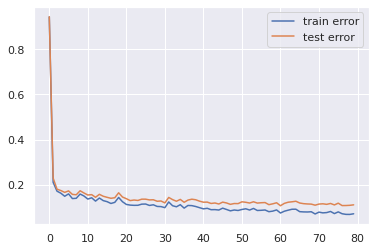

Train accuracy: 0.9219
Test accuracy: 0.885


In [12]:
epoch_train_accs, epoch_test_accs = [], []
for epoch in range(num_epochs):
    epoch_train_accs.append(error(train_loader, model))
    epoch_test_accs.append(error(test_loader, model))

    clear_output(True)
    plt.plot(np.arange(len(epoch_train_accs)), epoch_train_accs, label='train error')
    plt.plot(np.arange(len(epoch_test_accs)), epoch_test_accs, label='test error')
    plt.legend()
    plt.show()

    model.train()
    correct = 0
    for data, target in train_loader:
        opt.zero_grad()
        output = model(data.to(device))
        loss = loss_func(output.to(device), target.to(device))
        loss.backward()
        opt.step()

print(f'Train accuracy: {1 - error(train_loader, model)}')
print(f'Test accuracy: {1 - error(test_loader, model)}')

### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [13]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1, hidden_layer_size=(500, 500)):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            nn.Linear(input_shape, hidden_layer_size[0]),
            nn.Tanh(),
            nn.Linear(hidden_layer_size[0], hidden_layer_size[1]),
            nn.Tanh(),
            nn.Linear(hidden_layer_size[1], num_classes),
            nn.Tanh(),
            nn.Linear(num_classes, num_classes),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, inp):       
        return self.model(inp)

In [14]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 500]         392,500
              Tanh-3                  [-1, 500]               0
            Linear-4                  [-1, 500]         250,500
              Tanh-5                  [-1, 500]               0
            Linear-6                   [-1, 10]           5,010
              Tanh-7                   [-1, 10]               0
            Linear-8                   [-1, 10]             110
        LogSoftmax-9                   [-1, 10]               0
Total params: 648,120
Trainable params: 648,120
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.47
Estimated Total Size (MB): 2.50
-------------------------------------------

In [15]:
model = OverfittingNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.functional.nll_loss

num_epochs = 100

small_train_dataset = torch.utils.data.Subset(fmnist_dataset_train, np.arange(0, 10000))

train_loader = torch.utils.data.DataLoader(small_train_dataset, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)

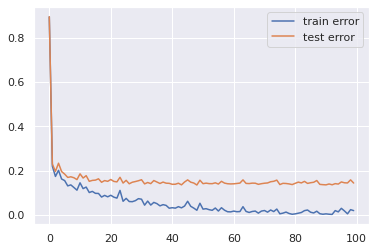

100%|██████████| 100/100 [08:32<00:00,  5.12s/it]


Train accuracy: 0.9818
Test accuracy: 0.8497


In [16]:
epoch_train_accs, epoch_test_accs = [], []
for epoch in tqdm(range(num_epochs)):
    epoch_train_accs.append(error(train_loader, model))
    epoch_test_accs.append(error(test_loader, model))

    clear_output(True)
    plt.plot(np.arange(len(epoch_train_accs)), epoch_train_accs, label='train error')
    plt.plot(np.arange(len(epoch_test_accs)), epoch_test_accs, label='test error')
    plt.legend()
    plt.show()

    model.train()
    correct = 0
    for data, target in train_loader:
        opt.zero_grad()
        output = model(data.to(device))
        loss = loss_func(output.to(device), target.to(device))
        loss.backward()
        opt.step()

print(f'Train accuracy: {1 - error(train_loader, model)}')
print(f'Test accuracy: {1 - error(test_loader, model)}')

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results. 

In [17]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1, hidden_layer_size=(500, 500)):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            nn.Linear(input_shape, hidden_layer_size[0]),
            nn.Dropout(),
            nn.Tanh(),
            nn.Linear(hidden_layer_size[0], hidden_layer_size[1]),
            nn.Dropout(),
            nn.Tanh(),
            nn.Linear(hidden_layer_size[1], num_classes),
            nn.Dropout(),
            nn.Tanh(),
            nn.Linear(num_classes, num_classes),
            nn.Dropout(),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [18]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 500]         392,500
           Dropout-3                  [-1, 500]               0
              Tanh-4                  [-1, 500]               0
            Linear-5                  [-1, 500]         250,500
           Dropout-6                  [-1, 500]               0
              Tanh-7                  [-1, 500]               0
            Linear-8                   [-1, 10]           5,010
           Dropout-9                   [-1, 10]               0
             Tanh-10                   [-1, 10]               0
           Linear-11                   [-1, 10]             110
          Dropout-12                   [-1, 10]               0
       LogSoftmax-13                   [-1, 10]               0
Total params: 648,120
Trainable params:

In [19]:
model = FixedNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.functional.nll_loss

num_epochs = 100

# Your experiments, come here

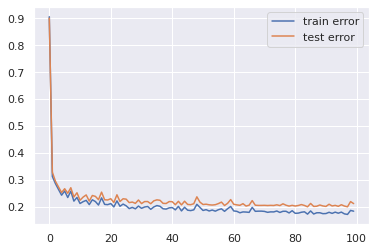

100%|██████████| 100/100 [08:31<00:00,  5.11s/it]


Train accuracy: 0.8281
Test accuracy: 0.799


In [20]:
epoch_train_accs, epoch_test_accs = [], []
for epoch in tqdm(range(num_epochs)):
    epoch_train_accs.append(error(train_loader, model))
    epoch_test_accs.append(error(test_loader, model))

    clear_output(True)
    plt.plot(np.arange(len(epoch_train_accs)), epoch_train_accs, label='train error')
    plt.plot(np.arange(len(epoch_test_accs)), epoch_test_accs, label='test error')
    plt.legend()
    plt.show()

    model.train()
    correct = 0
    for data, target in train_loader:
        opt.zero_grad()
        output = model(data.to(device))
        loss = loss_func(output.to(device), target.to(device))
        loss.backward()
        opt.step()

print(f'Train accuracy: {1 - error(train_loader, model)}')
print(f'Test accuracy: {1 - error(test_loader, model)}')


### Conclusions:

Точность на тестовой выборке без дропаута в какой-то момент перестает  улучшаться 


